In [ ]:
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import json
import pickle
import torch
from collections import defaultdict

dataset = 'fashioniq' # fashioniq, shoe
mode = 'jointcomp' # jointcomp, joint

scale = 1
if dataset=='fashioniq' and mode == 'sepcomp':
    scale = -1

### YOUR DATASET HERE
if dataset == 'fashioniq':
    img_root = '../dataset/fashioniq/resized_images'
elif dataset == 'shoe':
    img_root = '../dataset/shoe/resized_images'
    
def recall(actual, predicted, k):
    act_set = set([actual])
    pred_set = set(predicted[:k])
    result = len(act_set & pred_set) / float(len(act_set))
    return result

In [ ]:
if dataset == 'fashioniq':
    logdirs = ['fashioniq']#['fashioniq_dcnet']   ### YOUR LOGDIR HERE
elif dataset == 'shoe':
    logdirs = ['shoe_dcnet']
val = True 
comp_mats, corr_mats = {}, {}
i_ids, cap_data = {}, {}
for log in logdirs:
    if val:
        result = torch.load('../logdir/%s/best_score.pt'%log)
    else:
        result = torch.load('../logdir/%s/test/test_score.pt'%log)
    for cat in result['score']:
        comp_mats[cat] = result['score'][cat]['matrix_comp']
        corr_mats[cat] = result['score'][cat]['matrix_corr']

        i_ids[cat] = result['score'][cat]['ids']
        cap_data[cat] = result['score'][cat]['meta_info'] # key: candidate, target, captions
        

In [ ]:
from PIL import ImageFont
fontsize=14
font = ImageFont.truetype("DejaVuSerif.ttf", fontsize)

def show_predict(cat, idx, ranks):
    cnd_id = cap_data[cat][idx]['candidate']
    caps = cap_data[cat][idx]['captions']
    cnd_im = Image.open(os.path.join(img_root, cnd_id+'.jpg'))
    print("Candidate Image at idx={}:".format(idx))
    display(cnd_im)
    print("Captions:")
    print(caps)

    target_id = cap_data[cat][idx]['target']

    new_im = Image.new('RGB', (256*5, 256*2))
    x_offset = 0
    actual = target_id
    predicted = []
    for r in range(10):
        res_id = i_ids[cat][ranks[idx][r]]
        res_im = Image.open(os.path.join(img_root, res_id+'.jpg'))
        predicted.append(res_id)
        #print("Image rank:{}".format(ranks[idx][r]))
        #print("Image Score:{}".format(score[idx][ranks[idx][r]]))
        draw = ImageDraw.Draw(res_im,"RGBA")
        if(r==0):
           draw.rectangle(((5,5), (250, 250)), outline=(0, 0, 255, 127), width=5) 
        draw.text((190, 220),"Score:\n{:.2f}".format(score[idx][ranks[idx][r]]),(200,0,0),font=font)
        
        new_im.paste(res_im, (x_offset%(256*5), 256*(r//5)))
        if res_id == target_id:
            #print("found")
            draw.rectangle(((0,0), (255, 255)), outline=(0, 255, 0, 127), width=5)
            new_im.paste(res_im, (x_offset%(256*5), 256*(r//5)))

        x_offset += res_im.size[0]
    display(new_im)

    if val:
        print("answer")
        target_im = Image.open(os.path.join(img_root, target_id+'.jpg'))
        display(target_im)

    r10=recall(actual,predicted,10)
    print("Recall@10={r10:.2f}".format(r10=r10))

    cnd_im.save("{}cnd_image{}.jpg".format(cat,cnd_id))
    target_im.save("{}trg_image{}.jpg".format(cat,target_id))
    new_im.save("cat{}predictions_on{}.png".format(cat,cnd_id))

In [ ]:
result.keys()

## Qualitative Results

### Dress:

In [ ]:
mode='joint'

In [ ]:
idx=0
cat = 'dress'
if mode == 'joint':
    score = (comp_mats[cat] + corr_mats[cat])
elif mode == 'jointcomp':
    score = comp_mats[cat]
elif mode == 'jointcorr':
    score = corr_mats[cat]
ranks=score.argsort(dim=1, descending=True)

In [ ]:
type(score)

Candidate Image at idx=13:


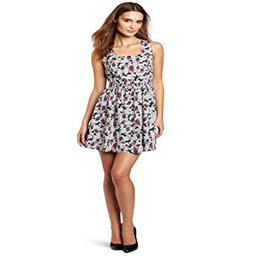

Captions:
['has more black designs', 'has a paint pattern']


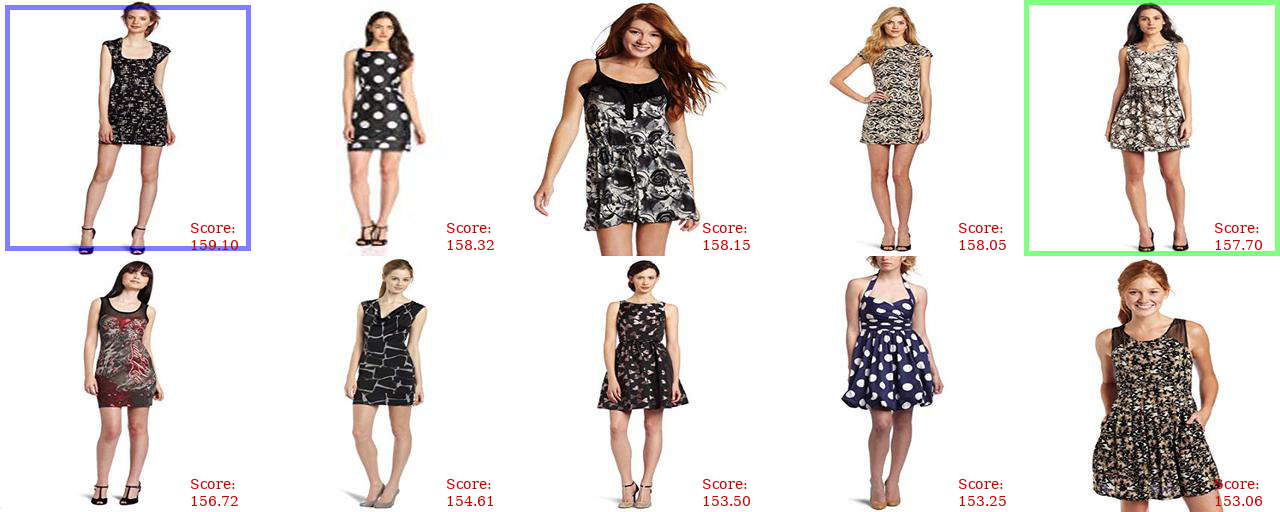

answer


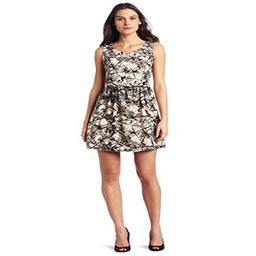

Recall@10=1.00


In [ ]:
# idx -=4
idx=13
show_predict(cat,idx,ranks)

Candidate Image at idx=10:


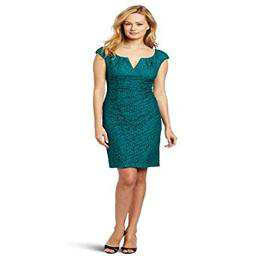

Captions:
['its blue with higher neckline', 'is more blue and higher at the neckline']


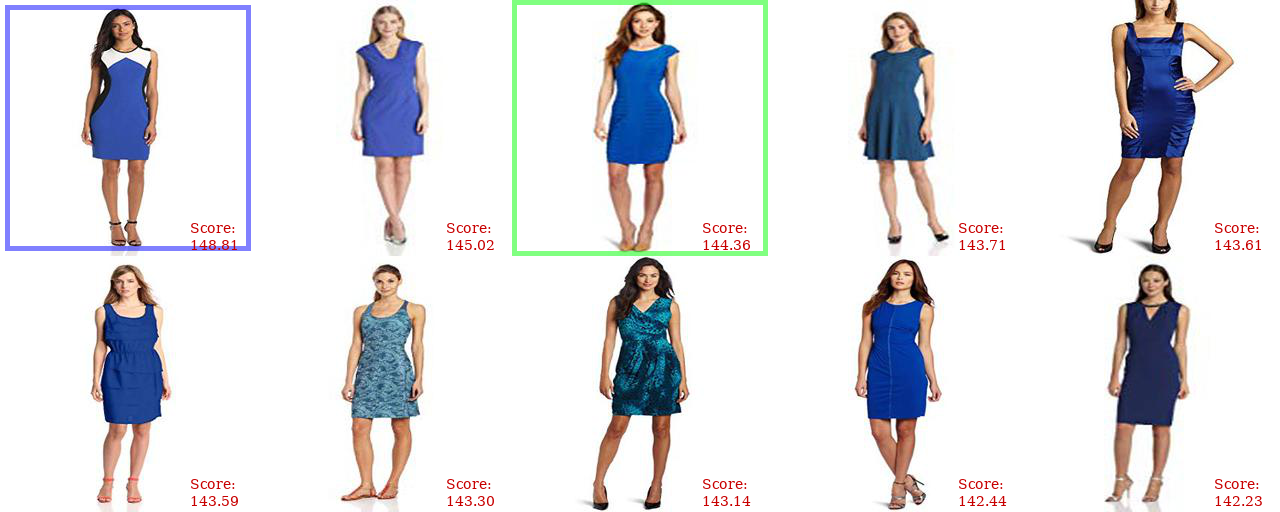

answer


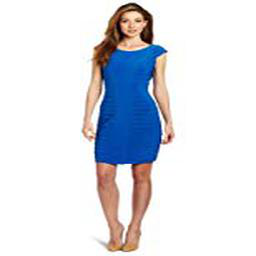

Recall@10=1.00


In [ ]:
idx=10
show_predict(cat,idx,ranks)

### Toptee:

In [ ]:
idx=0
cat = 'toptee'
if mode == 'joint':
    score = (comp_mats[cat] + corr_mats[cat])
elif mode == 'jointcomp':
    score = comp_mats[cat]
elif mode == 'jointcorr':
    score = corr_mats[cat]
ranks=score.argsort(dim=1, descending=True)

Candidate Image at idx=2:


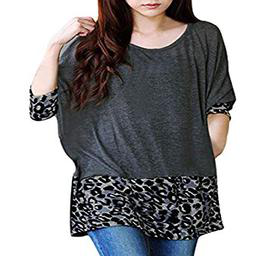

Captions:
['is yellow with fringe', 'is yellow with shorter sleeves']


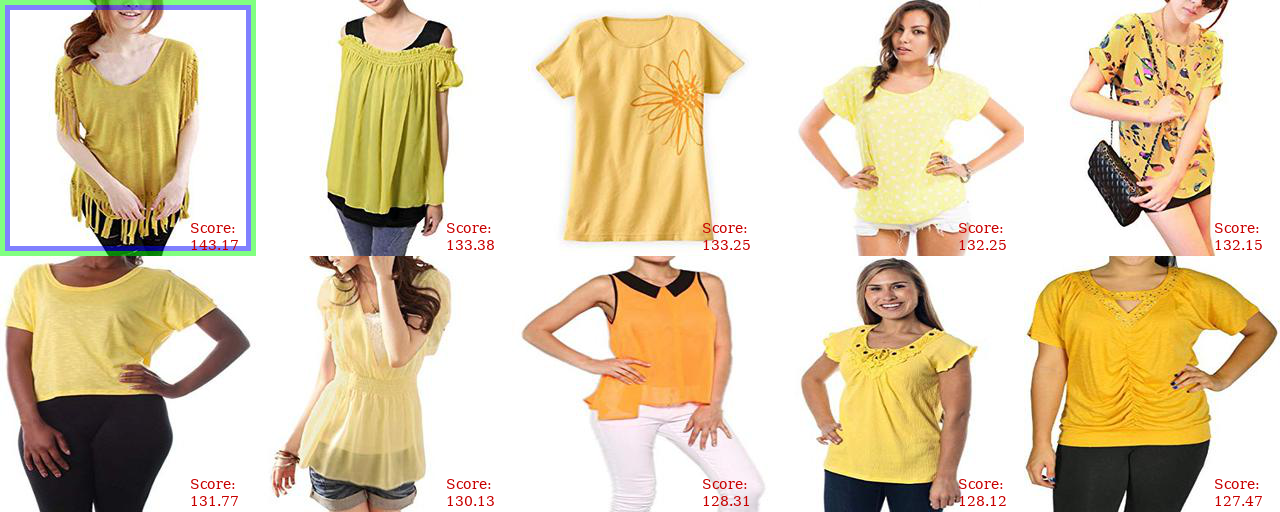

answer


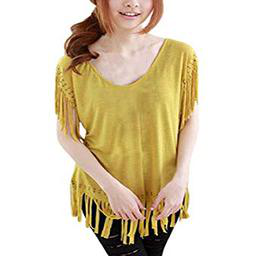

Recall@10=1.00


In [ ]:
idx=2
show_predict(cat,idx,ranks)

Candidate Image at idx=8:


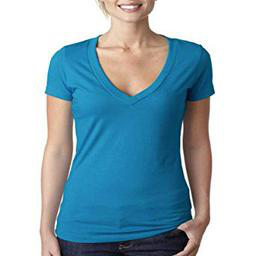

Captions:
['has a black color and no v-neck', 'is darker and has a higher neckline']


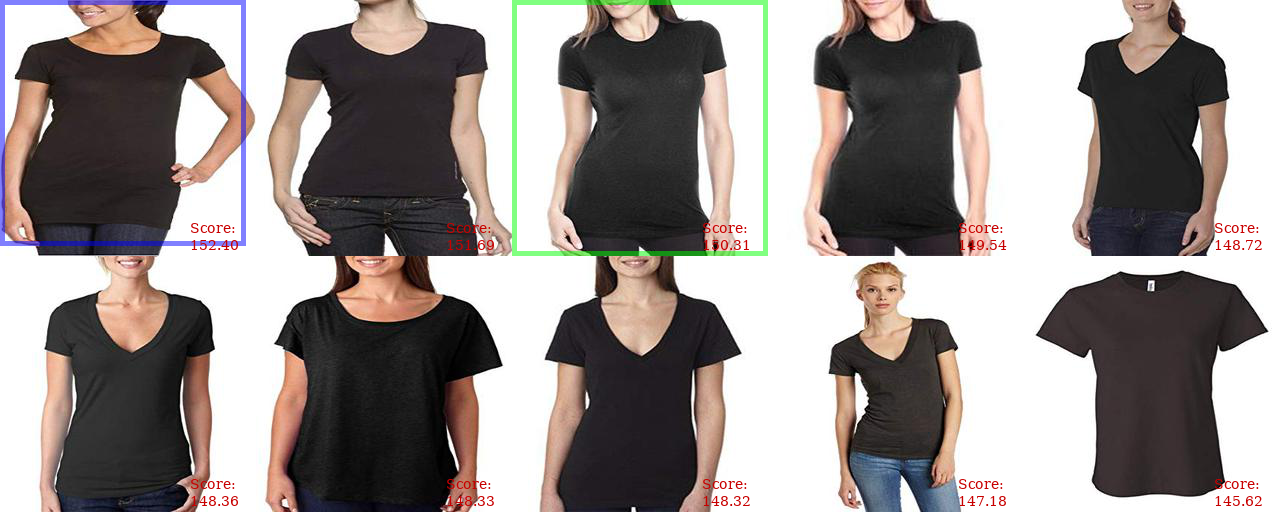

answer


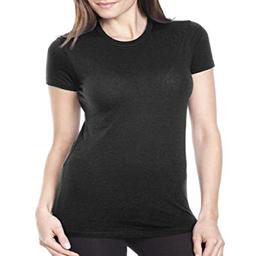

Recall@10=1.00


In [ ]:
idx=8
show_predict(cat,idx,ranks)

### Shirt:

In [ ]:
idx=0
cat = 'shirt'
if mode == 'joint':
    score = (comp_mats[cat] + corr_mats[cat])
elif mode == 'jointcomp':
    score = comp_mats[cat]
elif mode == 'jointcorr':
    score = corr_mats[cat]
ranks=score.argsort(dim=1, descending=True)

Candidate Image at idx=45:


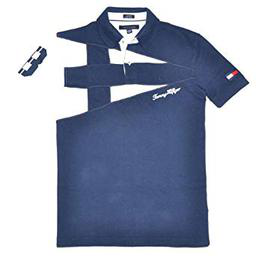

Captions:
['has long sleeves and is dressier', 'has long sleeves and buttons with pink stripes']


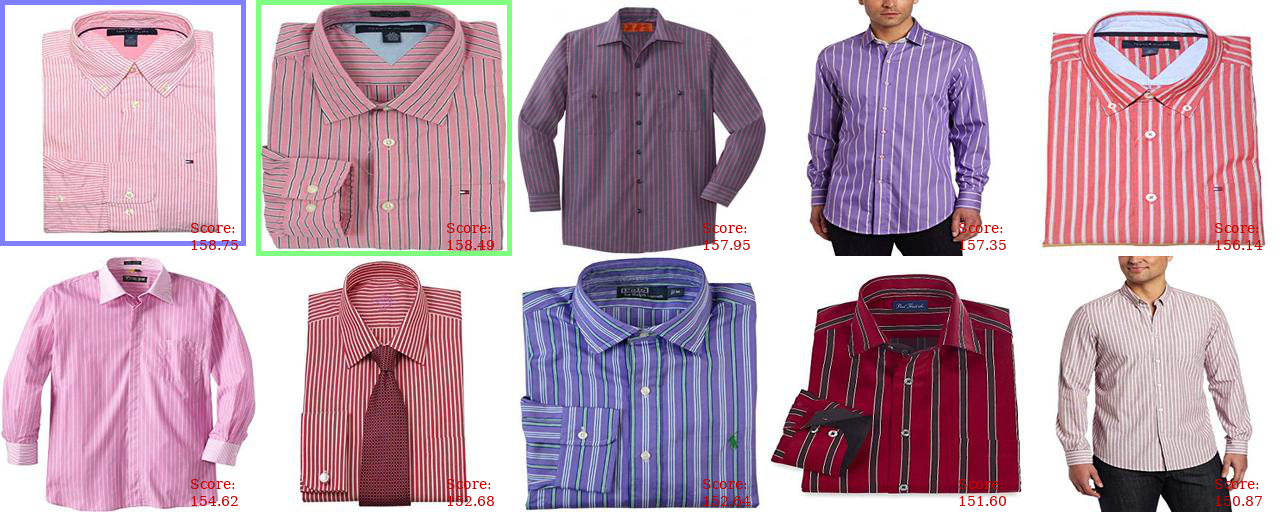

answer


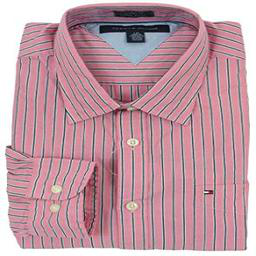

Recall@10=1.00


In [ ]:
idx=45
show_predict(cat,idx,ranks)